In [16]:
import pandas as pd
import numpy as np
import sys
import matplotlib.pyplot as plt

sys.path.append("../")
from adamodaran_utils import get_adamodar_file

In [17]:
years = np.array(range(2019,2024))
capex = dict.fromkeys(years)
for year in years:
    df = get_adamodar_file(filename="capex", year=year-2000)
    capex[year] = df


In [25]:
# Let us create a CapEx time series dataframe for all industries
capex_temp = pd.DataFrame()
for year in years:
    capex_temp[year] = capex[year][capex[year].filter(like="Capital Expenditure",axis=1).columns[0]] # Between data of different years, the column name is changing 

capex_ts = capex_temp.T
capex_ts.index = pd.to_datetime(capex_ts.index, format="%Y")+pd.offsets.YearEnd(0)

print(capex_ts.head())

top_10_capex_industries = capex_ts.mean().sort_values(ascending=False).head(10).index
bottom_10_capex_industries = capex_ts.mean().sort_values(ascending=False).tail(10).index
# print(top_10_capex_industries)

Industry Name  Advertising  Aerospace/Defense  Air Transport   Apparel  \
2019-12-31         666.885          11654.579      20189.779  1932.692   
2020-12-31         558.761          10697.170      12218.812  1480.826   
2021-12-31         582.311           9200.890       7396.651  1230.869   
2022-12-31        1441.579          10435.569      17571.783  1609.688   
2023-12-31         775.729          10982.128      25559.725  1730.981   

Industry Name  Auto & Truck  Auto Parts  Bank (Money Center)  \
2019-12-31        32412.939    3824.064              5457.60   
2020-12-31        29748.700    2831.591              3279.95   
2021-12-31        43973.902    3115.711              3957.00   
2022-12-31        33387.845    3128.291              4975.00   
2023-12-31        29899.486    3565.421              9161.10   

Industry Name  Banks (Regional)  Beverage (Alcoholic)  Beverage (Soft)  ...  \
2019-12-31             6172.089              1739.538         5696.487  ...   
2020-12-31  

In [19]:
dollar = dict.fromkeys(years)
if years[0] >= 2019:
    for year in years:
        df = get_adamodar_file(filename="DollarUS", year=year-2000)
        dollar[year] = df

    revenue_temp = pd.DataFrame()
    for year in years:
        revenue_temp[year] = dollar[year][dollar[year].filter(regex=".*Revenue.*",axis=1).columns[0]] # Between data of different years, the column name is changing 

    revenue_ts = revenue_temp.T
    revenue_ts.index = pd.to_datetime(revenue_ts.index, format="%Y")+pd.offsets.YearEnd(0)
    print(revenue_ts.head())

Industry  Name  Advertising  Aerospace/Defense  Air Transport    Apparel  \
2019-12-31        30171.866         417640.786     187459.404  76827.281   
2020-12-31        31929.256         386417.611     103261.180  58827.968   
2021-12-31        35236.063         355621.130     103563.730  68193.812   
2022-12-31        41079.513         358222.888     191721.510  72102.336   
2023-12-31        42281.556         387474.417     229031.320  71608.834   

Industry  Name  Auto & Truck  Auto Parts  Bank (Money Center)  \
2019-12-31        342991.848   88761.608             363874.0   
2020-12-31        290390.126   76296.877             310388.4   
2021-12-31        335192.330   97449.274             399387.6   
2022-12-31        401168.212   86581.600             380632.8   
2023-12-31        466503.368   96159.630             464296.6   

Industry  Name  Banks (Regional)  Beverage (Alcoholic)  Beverage (Soft)  ...  \
2019-12-31            176004.250             23986.202       121142.959 

In [20]:
# We similarly create a CapEx reinvestment rate time series dataframe for all industries
# Note: The reinvestment rate is about how much of post tax EBIT is invested in both working and fixed capital/R&D. This one only looks at the latter
capex_reinv_temp = pd.DataFrame()
for year in years:
    capex_reinv_temp[year] = capex[year][capex[year].filter(regex="Net Cap Ex.*EBIT",axis=1).columns[0]] # Between data of different years, the column name is changing 

capex_reinv_ts = capex_reinv_temp.T
capex_reinv_ts.index = pd.to_datetime(capex_reinv_ts.index, format="%Y")+pd.offsets.YearEnd(0)
# print(capex_reinv_ts.head())


In [21]:
acquisitions_temp = pd.DataFrame()
for year in years:
    acquisitions_temp[year] = capex[year][capex[year].filter(regex="Net Cap Ex.*EBIT",axis=1).columns[0]] # Between data of different years, the column name is changing 

acquisitions_ts = acquisitions_temp.T
acquisitions_ts.index = pd.to_datetime(acquisitions_ts.index, format="%Y")+pd.offsets.YearEnd(0)


In [22]:
# We have to always see capital expenditures and reinvestment rates in the context of revenues. But unfortuantely 
# DollarUS files that have the revenue figures don't go back before 2019. So we have to reverse entineer revenues
# from Net Capex/Sales and Net Capex, which itself needs to be reverse engineered from Capital Expenditure and Depreciation
depr_temp = pd.DataFrame()
for year in years:
    depr_temp[year] = capex[year][capex[year].filter(regex="Depreciation.*",axis=1).columns[0]] # Between data of different years, the column name is changing 

depr_ts = depr_temp.T
depr_ts.index = pd.to_datetime(depr_ts.index, format="%Y")+pd.offsets.YearEnd(0)

netcapex_ts = capex_ts - depr_ts

netcapex_to_sales_temp = pd.DataFrame()
for year in years:
    netcapex_to_sales_temp[year] = capex[year][capex[year].filter(regex="Net Cap Ex.*Sales",axis=1).columns[0]] # Between data of different years, the column name is changing 

netcapex_to_sales_ts = netcapex_to_sales_temp.T
netcapex_to_sales_ts.index = pd.to_datetime(netcapex_to_sales_ts.index, format="%Y")+pd.offsets.YearEnd(0)

sales_ts = netcapex_ts / netcapex_to_sales_ts

sales_ts.head()
# sales_ts.index = pd.to_datetime(sales_ts.index, format="%Y")+pd.offsets.YearEnd(0)

Industry Name,Advertising,Aerospace/Defense,Air Transport,Apparel,Auto & Truck,Auto Parts,Bank (Money Center),Banks (Regional),Beverage (Alcoholic),Beverage (Soft),...,Telecom. Equipment,Telecom. Services,Tobacco,Transportation,Transportation (Railroads),Trucking,Utility (General),Utility (Water),Total Market,Total Market (without financials)
2019-12-31,-5202.441374,-17931.436371,187226.982420,-7513.017138,297935.661247,30141.292733,363874.000000,1.002227e+06,18729.483880,19526.444814,...,6956.458744,427030.570530,39549.784547,183483.294285,48780.500000,73958.427358,70817.652328,5849.488074,3.847995e+06,3.153296e+06
2020-12-31,43327.671127,292380.556527,101782.581074,-1585.820913,306175.522402,39148.217482,310388.400000,3.704820e+05,22887.569825,27502.280866,...,8097.744867,446008.834237,45037.633748,194011.587653,42821.700000,81759.176597,107989.500665,2353.184872,3.941417e+05,-4.183634e+05
2021-12-31,-49218.753184,-809956.424113,109051.573462,-5549.448790,301700.527065,18601.926016,399387.600000,9.793685e+04,19084.119904,134257.570795,...,4465.813826,-181011.171429,10730.978575,221039.298199,27382.145341,102665.088336,111309.622178,7238.873709,1.647438e+06,9.368180e+05
2022-12-31,-18079.335374,-502620.513534,185845.866230,16053.579374,353823.183070,36556.820409,380632.800000,-1.505840e+05,25032.091004,49751.971619,...,14359.807471,55546.173057,38696.910731,184228.914660,47553.411105,109157.577147,127505.304412,7042.804107,5.618924e+06,4.736428e+06
2023-12-31,65829.878263,-102038.911751,222457.800768,64211.670976,422243.140726,48304.699493,707249.228024,-5.209082e+04,14704.025856,141738.926832,...,27278.474190,234972.888590,2936.093751,274038.020421,50772.792873,78778.531876,117497.400692,8525.902926,8.566713e+06,7.605149e+06


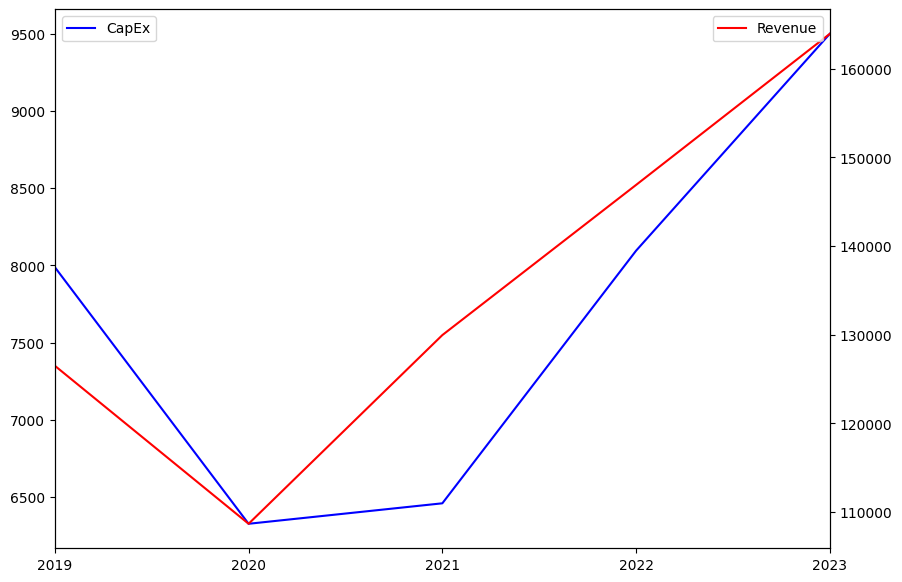

In [34]:
# Visualize reinvestment rates
fig,ax = plt.subplots(1,1,figsize=(10,7))
industry = "Restaurant/Dining"  # Pick an industry from the column names of capex_reinv_ts
capex_ts.plot(y=[industry], ax=ax, color="blue",label=["CapEx"])
ax.legend(loc="upper left")
ax1 = ax.twinx()
revenue_ts.plot(y=[industry], ax=ax1, color='red', label=["Revenue"])
ax1.legend(loc="upper right")


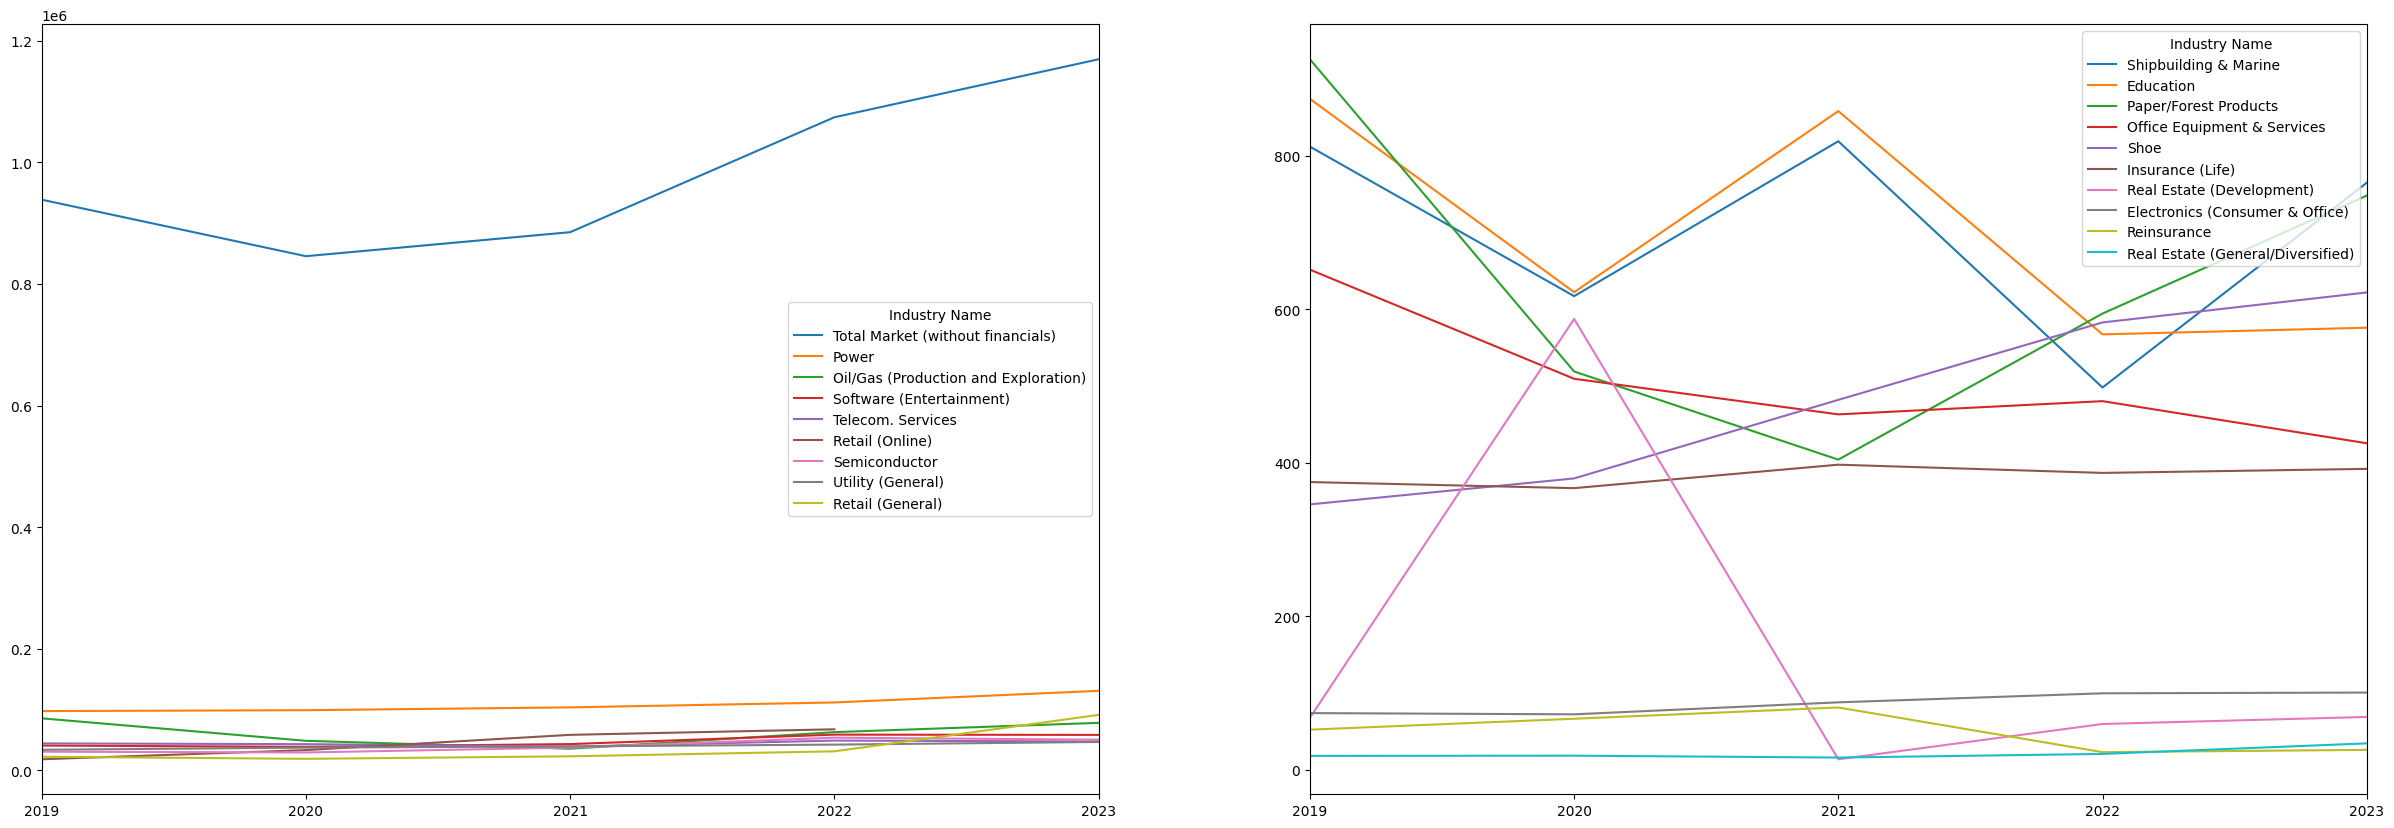

In [24]:
# capex_reinv_ts.plot(y=[industry], ax=ax, color="blue",label=["Reinvestment Rate"])
fig,ax = plt.subplots(1,2,figsize=(30,10))
capex_ts.loc[:,top_10_capex_industries].drop(columns=['Total Market']).plot(ax=ax[0])
capex_ts.loc[:,bottom_10_capex_industries].plot(ax=ax[1])
# ax.legend(loc="upper left")
plt.show()